# Expectation - Maximization

Tutorial for Expectation - Maximization algorithm for Gaussian Mixture Model based on https://archive.ics.uci.edu/ml/datasets/seeds#

Obtained via:
Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

## Gaussian mixture model.
Gaussian mixure model represents normally distributed subpolulations within the given population. 

The model is defined as follows:

(one dimensional case)

p(x) = sum_{k=1}^{K} w_k * N(x | u_k, s_k)

where w_k is a latent class weight,
N is a normal distribution with mean u_k and variance s_k^2.

and sum_{k=1}^{K} w_k = 1.

Links:
<ul>
    <li>[1] https://en.wikipedia.org/wiki/Mixture_model</li>
    <li>[2] https://brilliant.org/wiki/gaussian-mixture-model/</li>
</ul>

### Problem statement:

Assuming that the observed data follows the Gaussian Mixture distribution, find the parameters of that distribution. 

The typical way of learning the parameters is maximum likelihood estimation, which selects the parameters for which the likelihood of the observed data is the highest.

However, for the Gaussian Mixture Model the usual way of maximum likelihood estimation is analytically impossible.

## Expectation - Maximization algorithm

Expectation - Maximization algorithm is an iterative way of to find maximum likelihood estimates of parameters for models, in which the distribution depends on k - unobserved latent features.

GMM is such a model - we assume that each object belongs to one of k classes, and that the observed features are normally distributed for each of those classes.

The Expectation - Maximization algorithm iteratively performs two steps:
- calculates the expectations that a given observation belongs to class C_k
- based on the above expectations, updates the model parameters. 

As EM algorithm calculates the expectations that a given observation belongs to class C_k, after the model is fit, the clustering can be obtained by reading the final class assignments.

Links:
<ul>
    <li>[1] https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm</li>
    <li>[2] https://brilliant.org/wiki/gaussian-mixture-model/</li>
</ul>

## Example
The below example shows how to use sklearn library to cluster data using EM for GMM.
The data represents "measurements of geometrical properties of kernels belonging to three different varieties of wheat." The variety is known and given in the data set. However, in the example variety will not be used for clustering. 

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score

In [234]:
seeds_columns = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "assymetry_coef", "kernel_groove_length", "variety"]
seeds = pd.read_csv("seeds_dataset.txt", delimiter="\t", header=None, names=seeds_columns)

In [235]:
seeds.describe()

,area,perimeter,compactness,kernel_length,kernel_width,assymetry_coef,kernel_groove_length,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [236]:
seeds.head()

,area,perimeter,compactness,kernel_length,kernel_width,assymetry_coef,kernel_groove_length,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


[]

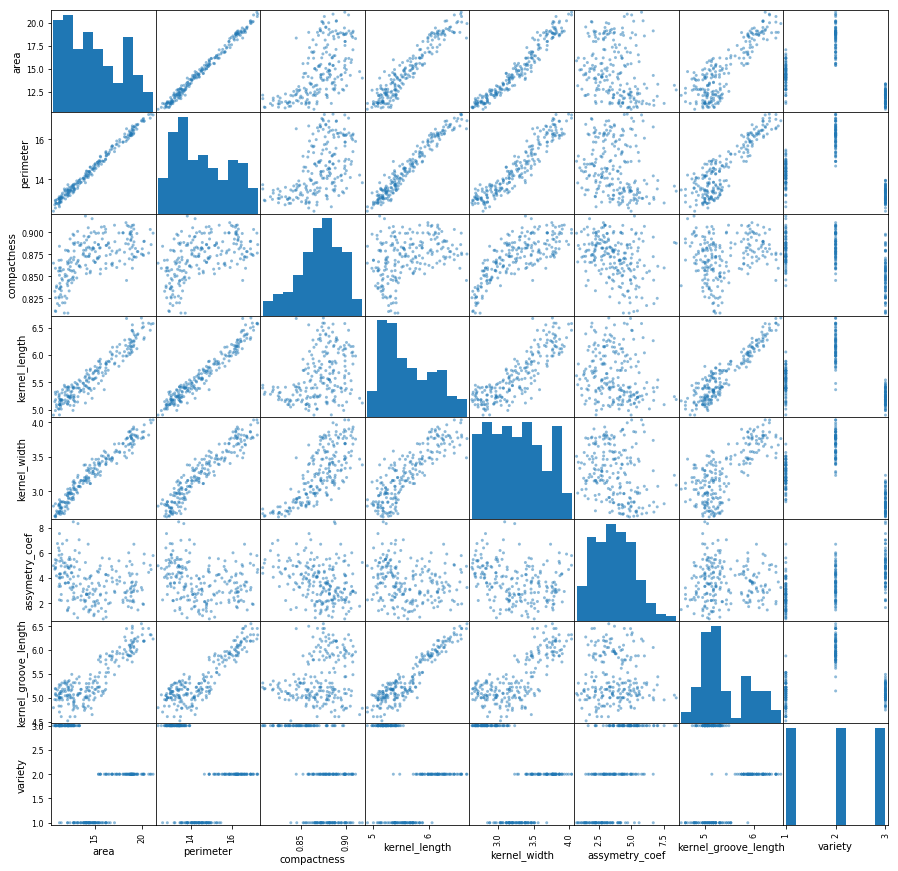

In [237]:
from pandas.plotting import scatter_matrix
scatter_matrix(seeds, figsize=(15, 15))
plt.plot()

### Investigating features distributions

Below plots shows histograms of seeds features grouped by true seeds varieties. Within each class, features seem to follow gaussian distribution. Some of the features, like perimeter, area, kernel_width or kernel_length seem to separate the observation clusters well.

variety
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: kernel_groove_length, dtype: object

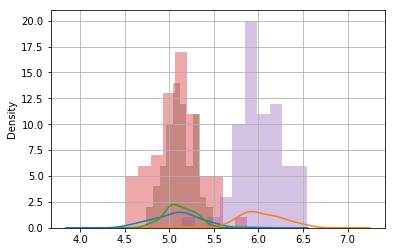

In [238]:
seeds.groupby("variety").kernel_groove_length.plot(kind='kde')
seeds.groupby("variety").kernel_groove_length.hist(alpha=0.4)

variety
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: assymetry_coef, dtype: object

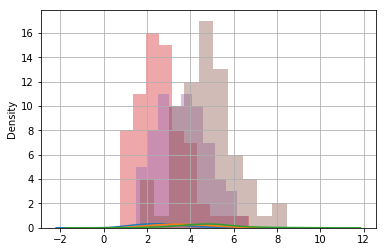

In [239]:
seeds.groupby("variety").assymetry_coef.plot(kind='kde')
seeds.groupby("variety").assymetry_coef.hist(alpha=0.4)

variety
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: perimeter, dtype: object

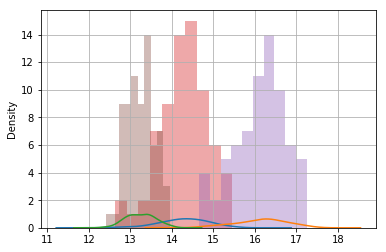

In [240]:
seeds.groupby("variety").perimeter.plot(kind='kde')
seeds.groupby("variety").perimeter.hist(alpha=0.4)

variety
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: area, dtype: object

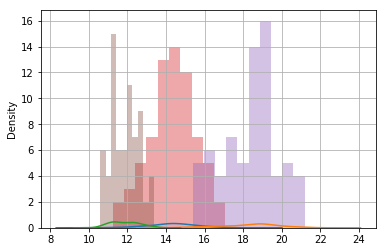

In [241]:
seeds.groupby("variety").area.plot(kind='kde')
seeds.groupby("variety").area.hist(alpha=0.4)

variety
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: compactness, dtype: object

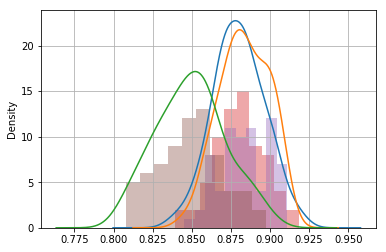

In [242]:
seeds.groupby("variety").compactness.plot(kind='kde')
seeds.groupby("variety").compactness.hist(alpha=0.4)

variety
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: kernel_length, dtype: object

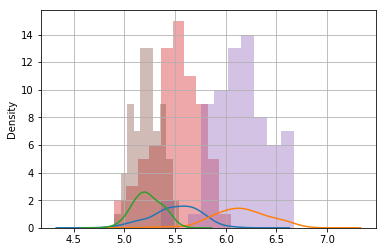

In [243]:
seeds.groupby("variety").kernel_length.plot(kind='kde')
seeds.groupby("variety").kernel_length.hist(alpha=0.4)

variety
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: kernel_width, dtype: object

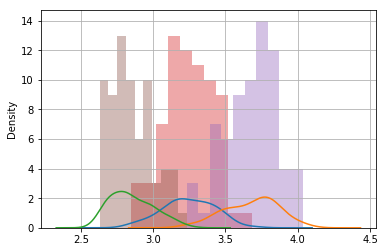

In [244]:
seeds.groupby("variety").kernel_width.plot(kind='kde')
seeds.groupby("variety").kernel_width.hist(alpha=0.4)

# One dimensional GMM 

The below example will use the perimeter feature only to build the GMM model. 
Based on that model, the data will be clustered.

In [245]:
X = seeds[["perimeter"]]
y = seeds.variety

In [246]:
# As the model is using the class labels distributions to calulate a-priori weigths, the stratified fold is used.

skf = StratifiedKFold(n_splits=5)
train_index, test_index = next(iter(skf.split(X, y)))
X_train = X.loc[train_index, :]
y_train = y.loc[train_index]
X_test = X.loc[test_index, :]
y_test = y.loc[test_index]

In [247]:
# Train the model
clf = GaussianMixture(n_components=3, covariance_type='full', max_iter=100)
model = clf.fit(X_train) 

In [248]:
# Does the model converge?
model.converged_

True

In [249]:
# The final model weigths (responsibilities are initialized using kmeans.)
model.weights_

array([0.43710633, 0.2752051 , 0.28768857])

In [250]:
# The model means vs sample means
print('Model means:')
print(model.means_)
print('Sample means:')
X_train.groupby(by=y_train).mean()

Model means:
[[13.29030665]
 [16.37275168]
 [14.65055963]]
Sample means:


,perimeter
variety,
1,14.242321
2,16.149821
3,13.197679


The model approximates the cluster means well.

In [251]:
# The model variances vs sample variances
print('Model variances:')
print(model.covariances_)
print('Sample variances:')
X_train.groupby(by=y_train).var()

Model variances:
[[[0.14500529]]

 [[0.17364346]]

 [[0.17259483]]]
Sample variances:


,perimeter
variety,
1,0.344549
2,0.398002
3,0.104789


Below one can observe the distribution of model class assignments

In [252]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: perimeter, dtype: object

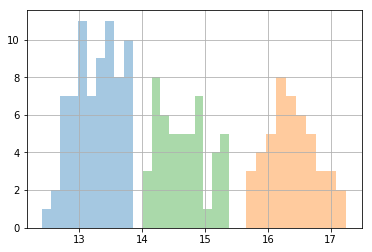

In [253]:
X_train.groupby(by=y_train_pred).perimeter.hist(alpha=0.4)

0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: perimeter, dtype: object

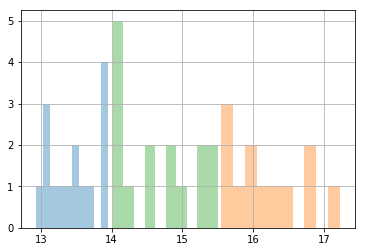

In [254]:
X_test.groupby(by=y_test_pred).perimeter.hist(alpha=0.4)

## All features

The below uses all features to cluster seeds data.

In [255]:
X = seeds.drop('variety', axis=1)
y = seeds.variety

In [256]:
skf = StratifiedKFold(n_splits=5)
train_index, test_index = next(iter(skf.split(X, y)))
X_train = X.loc[train_index, :]
y_train = y.loc[train_index]
X_test = X.loc[test_index, :]
y_test = y.loc[test_index]

In [257]:
clf = GaussianMixture(n_components=3, covariance_type='full', max_iter=100)
model = clf.fit(X_train)

In [258]:
# Model weights
model.weights_

array([0.30398842, 0.42236085, 0.27365073])

In [259]:
print('Model means')
print(model.means_)
print('Sample means')
X_train.groupby(by=y_train).mean()

Model means
[[14.9977469  14.63046996  0.88002681  5.62364809  3.31799506  2.96753022
   5.28327431]
 [11.97987517 13.25997688  0.85535751  5.21045078  2.88643457  4.27973401
   5.0322627 ]
 [18.94931038 16.37836637  0.88741252  6.23613821  3.75537706  3.41923944
   6.08556245]]
Sample means


,area,perimeter,compactness,kernel_length,kernel_width,assymetry_coef,kernel_groove_length
variety,,,,,,,
1,14.210536,14.242321,0.878696,5.492821,3.224286,2.696914,5.082393
2,18.390357,16.149821,0.884680,6.153732,3.688286,3.505143,6.023196
3,11.812500,13.197679,0.851509,5.203661,2.853661,4.734036,5.084821


In [260]:
print('Model covariances')
print(model.covariances_)
print('Sample covariances')
X_train.groupby(by=y_train).cov()

Model covariances
[[[ 7.07331474e-01  3.35424030e-01  1.05164016e-03  1.03151018e-01
    8.73748700e-02  1.06069711e-01  1.61772626e-01]
  [ 3.35424030e-01  1.76620195e-01 -1.61759188e-03  6.62669304e-02
    3.17085784e-02  4.65654359e-02  9.85122621e-02]
  [ 1.05164016e-03 -1.61759188e-03  2.58519153e-04 -1.95263370e-03
    1.30909453e-03  7.83309415e-04 -2.40406210e-03]
  [ 1.03151018e-01  6.62669304e-02 -1.95263370e-03  3.78827096e-02
    2.31590784e-03  1.07978475e-02  4.84528813e-02]
  [ 8.73748700e-02  3.17085784e-02  1.30909453e-03  2.31590784e-03
    1.74111362e-02  2.30498380e-02  6.84926084e-03]
  [ 1.06069711e-01  4.65654359e-02  7.83309415e-04  1.07978475e-02
    2.30498380e-02  1.61599031e+00  8.63080129e-02]
  [ 1.61772626e-01  9.85122621e-02 -2.40406210e-03  4.84528813e-02
    6.84926084e-03  8.63080129e-02  9.39479820e-02]]

 [[ 5.63380204e-01  2.40439340e-01  9.14383676e-03  5.63077399e-02
    9.82646457e-02 -2.95965867e-01 -6.53101698e-03]
  [ 2.40439340e-01  1.234441

area  perimeter  compactness  kernel_length  \
variety                                                                         
1       area                  1.547652   0.712091     0.008674       0.238873   
        perimeter             0.712091   0.344549     0.002006       0.125315   
        compactness           0.008674   0.002006     0.000288      -0.000485   
        kernel_length         0.238873   0.125315    -0.000485       0.054503   
        kernel_width          0.209568   0.088467     0.002125       0.023763   
        assymetry_coef        0.002495  -0.008191     0.001823      -0.002930   
        kernel_groove_length  0.222368   0.115950    -0.000381       0.050592   
2       area                  2.120931   0.896346     0.005480       0.335188   
        perimeter             0.896346   0.398002     0.000207       0.159831   
        compactness           0.005480   0.000207     0.000250      -0.001162   
        kernel_length         0.335188   0.159831    -0.001162       0.078233   
        kernel_width          0.240774   0.090940     0.001818       0.026490   
        assymetry_coef        0.013384   0.002579    -0.000256      -0.007549   
        kernel_groove_length  0.268562   0.131392    -0.001292       0.068073   
3       area                  0.482506   0.201348     0.008605       0.042797   
        perimeter             0.201348   0.104789     0.000954       0.033290   
        compactness           0.008605   0.000954     0.000489      -0.001209   
        kernel_length         0.042797   0.033290    -0.001209       0.017923   
        kernel_width          0.089118   0.026912     0.002887       0.000126   
        assymetry_coef       -0.049405  -0.020665    -0.001282       0.003006   
        kernel_groove_length  0.014222   0.022773    -0.001893       0.016564   

                              kernel_width  assymetry_coef  \
variety                                                      
1       area                      0.209568        0.002495   
        perimeter                 0.088467       -0.008191   
        compactness               0.002125        0.001823   
        kernel_length             0.023763       -0.002930   
        kernel_width              0.034140        0.012332   
        assymetry_coef            0.012332        1.492334   
        kernel_groove_length      0.021092        0.006172   
2       area                      0.240774        0.013384   
        perimeter                 0.090940        0.002579   
        compactness               0.001818       -0.000256   
        kernel_length             0.026490       -0.007549   
        kernel_width              0.034998        0.019676   
        assymetry_coef            0.019676        1.349645   
        kernel_groove_length      0.018113       -0.021307   
3       area                      0.089118       -0.049405   
        perimeter                 0.026912       -0.020665   
        compactness               0.002887       -0.001282   
        kernel_length             0.000126        0.003006   
        kernel_width              0.022357        0.003115   
        assymetry_coef            0.003115        1.766900   
        kernel_groove_length     -0.006077       -0.003320   

                              kernel_groove_length  
variety                                             
1       area                              0.222368  
        perimeter                         0.115950  
        compactness                      -0.000381  
        kernel_length                     0.050592  
        kernel_width                      0.021092  
        assymetry_coef                    0.006172  
        kernel_groove_length              0.063891  
2       area                              0.268562  
        perimeter                         0.131392  
        compactness                      -0.001292  
        kernel_length                     0.068073  
        kernel_width                      0.018113  
 

The sample means seems to be well estimated by the model.

In [261]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [262]:
# Look at the data to identify how the clusters should be labeled.
y_train_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

To calulate the accuracy for the traning and testing clustering, the predictions needs to be relabeled. Based on the above output, one can assume that 0 -> 1, 2 -> 2, 1 -> 3.

In [268]:
y_train_pred_relabeled = y_train_pred
y_train_pred_relabeled[y_train_pred_relabeled == 0] = 1
y_train_pred_relabeled[y_train_pred_relabeled == 1] = 3

In [269]:
y_train_pred_relabeled

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [265]:
print("Train accuracy")
accuracy_score(y_train, y_train_pred_relabeled)

Train accuracy


0.35714285714285715

In [266]:
y_test_pred_relabeled = y_test_pred
y_test_pred_relabeled[y_test_pred_relabeled == 0] = 3

In [267]:
print("Test accuracy")
accuracy_score(y_test, y_test_pred_relabeled)

Test accuracy


0.23809523809523808